### Regression from sratch ###
1. Write a python code using only numpy to impement a solution of 

$$ \hat{\beta} = (X^TX)^{-1}X^Ty $$

2. compare with a simpler solution 

$$ \hat{\beta} = (X)^{-1}y $$

3. implement a python code, using only numpy that uses a gradient descent to find the solution of the linear regression coefficient $\beta$, using three different losses:

   * $L_2 = \frac{1}{N}\sum_{i=1}^N (y_i -f(x_i))^2 $

   * $L_1 = \frac{1}{N}\sum_{i=1}^N | y_i -f(x_i)| $

   * $L_{LC}= \frac{1}{N}\sum_{i=1}^N \ln [ \cosh (y_i -f(x_i)) ] $
   
   * Remember for the gradient descent:
$$
\vec{\beta}(i+1) = \vec{\beta}(i) - \alpha\cdot \nabla_{\vec{\beta}}Loss(\vec{\beta}| Data) \\
$$
$\vec{\beta}$ is the vector of the coefficient (including the intercept)

4. start considering a one-dimensional dataset provided to generate some outliers. 
Compare the different losses using both training and testing sets in different plots

In [1]:
%matplotlib inline
import numpy as np
def mk_data(minR=-5,maxR=5, step=0.5, sigma=1):
    a = -5.0
    b = 3.0
    x = np.arange(minR,maxR,0.1)
    y = b*x + a + np.random.normal(0,sigma, len(x))
    x = x + np.random.normal(0,sigma, len(x))
    return  x, y
def add_outliers(y,inc = 20.0):
    idx = np.argsort(y)
    y[idx[:2]] += inc
    y[idx[-2:]] -= inc
    return y
s = 0.5
XL, yL = mk_data(sigma=s) # training sets
yL = add_outliers(yL)
XT, yT = mk_data(minR=5,maxR=15, step=1, sigma=s)  # test sets

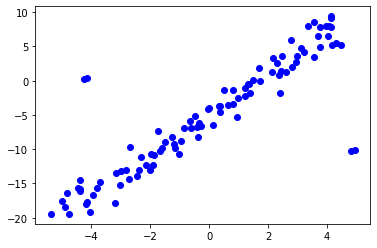

In [6]:
## plot the data##
import matplotlib.pyplot as plt
plt.plot(XL,yL, 'bo')

# Punto 1 

In [128]:
X = XL.reshape(100,1);
Xtest = XT.reshape(100,1);
X;

In [129]:
y = yL.reshape(100,1);
ytest = yT.reshape(100,1)
y;

In [157]:
Xext = np.insert(X, 0, np.ones(X.shape[0]), axis = 1)
Xtestext = np.insert(Xtest, 0, np.ones(X.shape[0]), axis = 1)

In [76]:
# print(Xext)

In [73]:
##  write the code ##
beta = np.linalg.inv(Xext.transpose().dot(Xext)).dot(Xext.transpose()).dot(y)

In [86]:
print(beta)

[[-4.98524229]
 [ 2.4991662 ]]


# Punto 2 

In [84]:
beta1 = np.reciprocal(Xext).transpose().dot(y)

In [85]:
print(beta1)

[[-513.43979205]
 [ 935.18111233]]


# Punto 3 

Gradient descent per la Loss function L2

In [110]:
## funzione che implementa il gradient descent 
## l_rate: learning rate
def GD_L2(x,y,steps,l_rate):
    dim = x.shape[1] ## corrisponde al numero dei pesi, 
    ##1 è il bias e l'altro è associato alla x 
    beta = np.zeros(dim).reshape(dim,1)
    for i in range(steps):
        beta = beta - l_rate * (x.dot(beta) - y).transpose().dot(x).transpose()
    return beta 

l_rate = 0.001
steps = 1000
# dim = Xext.shape
beta_L2 = GD_L2(Xext,y,steps,l_rate)
print(beta_L2)
    
    

[[-4.98524229]
 [ 2.4991662 ]]


Gradient descent per la loss function L1

In [120]:
def GD_L1(x,y,steps,l_rate):
    dim = x.shape[1] ## corrisponde al numero dei pesi, 
    ##1 è il bias e l'altro è associato alla x 
    beta = np.zeros(dim).reshape(dim,1)
    
    for i in range(steps):
        beta = beta - l_rate * np.sign((x.dot(beta) - y)).transpose().dot(x).transpose()
    return beta 

l_rate = 0.001
steps = 1000
# dim = Xext.shape
beta_L1 = GD_L1(Xext,y,steps,l_rate)
print(beta_L1)
    

[[-4.89      ]
 [ 2.83291244]]


Gradient descent per la loss function Llc

In [125]:
def GD_Llc(x,y,steps,l_rate):
    dim = x.shape[1] ## corrisponde al numero dei pesi, 
    ##1 è il bias e l'altro è associato alla x 
    beta = np.zeros(dim).reshape(dim,1)
    
    for i in range(steps):
        beta = beta - l_rate * np.tanh((x.dot(beta) - y)).transpose().dot(x).transpose()
    return beta 

l_rate = 0.001
steps = 1000
# dim = Xext.shape
beta_Llc = GD_Llc(Xext,y,steps,l_rate)
print(beta_Llc)
    

[[-4.94777289]
 [ 2.82966656]]


# Punto 4

Loss L2

In [141]:
def L2(x, y, beta):
    ## numero di dati 
    n = x.shape[0]
    loss = (1 / n) * (y - x.dot(beta)).transpose().dot((y - x.dot(beta)))
    return loss


In [160]:
loss_L2_train = L2(Xext,y,beta_L2)
loss_L2_test = L2(Xtestext,ytest,beta_L2)
print(loss_L2_train)
print(loss_L2_test)

[[14.56686188]]
[[27.95734084]]


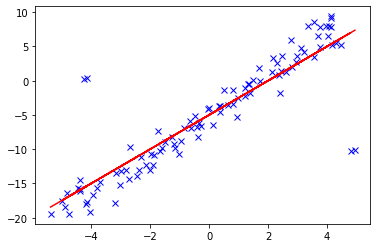

In [161]:
p_L2_train = plt.plot(XL,yL, 'bx')
p_L2_train = plt.plot(XL,Xext.dot(beta_L2), 'r-')

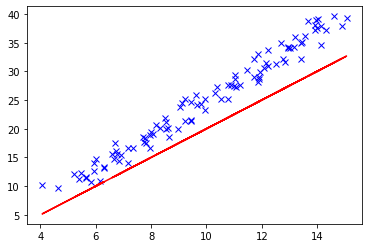

In [162]:
p_L2_test = plt.plot(XT,yT, 'bx')
p_L2_test = plt.plot(XT,Xtestext.dot(beta_L2), 'r-')

Loss L1

In [145]:
def L1(x, y, beta):
    ## numero di dati 
    n = x.shape[0]
    loss = (1 / n) * np.sqrt((y - x.dot(beta)).transpose().dot((y - x.dot(beta))))
    return loss


In [158]:
loss_L1_train = L1(Xext,y,beta_L2)
loss_L1_test = L1(Xtestext,ytest,beta_L2)
print(loss_L1_train)
print(loss_L1_test)

[[0.38166559]]
[[0.52874702]]


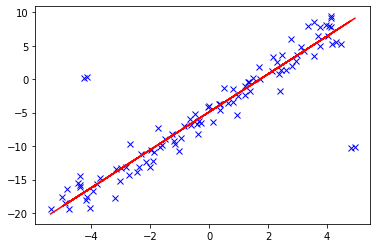

In [163]:
p_L1_train = plt.plot(XL,yL, 'bx')
p_L1_train = plt.plot(XL,Xext.dot(beta_L1), 'r-')

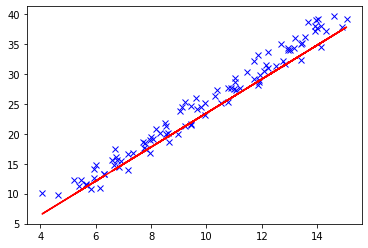

In [164]:
p_L1_test = plt.plot(XT,yT, 'bx')
p_L1_test = plt.plot(XT,Xtestext.dot(beta_L1), 'r-')

Loss Llc

In [152]:
def Llc(x, y, beta):
    ## numero di dati 
    n = x.shape[0]
    loss = (1 / n) * np.sum(np.log(np.cosh((y - x.dot(beta)))))
                            
    return loss


In [159]:
loss_Llc_train = Llc(Xext,y,beta_L2)
loss_Llc_test = Llc(Xtestext,ytest,beta_L2)
print(loss_Llc_train)
print(loss_Llc_test)

1.5828143396882342
4.237246380242615


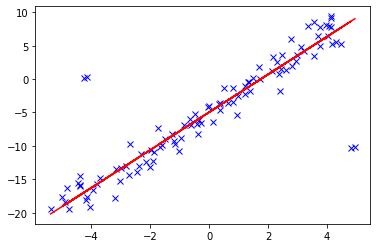

In [165]:
p_Llc_train = plt.plot(XL,yL, 'bx')
p_Llc_train = plt.plot(XL,Xext.dot(beta_Llc), 'r-')

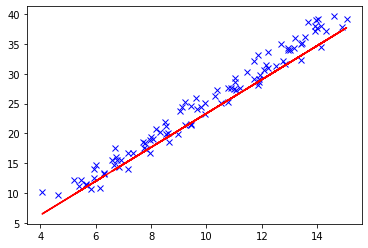

In [166]:
p_Llc_test = plt.plot(XT,yT, 'bx')
p_Llc_test = plt.plot(XT,Xtestext.dot(beta_Llc), 'r-')